# Importación de librerias

In [118]:
#Para Modelado y limpieza de datos
import pandas as pd
import numpy as np
#from funpymodeling.exploratory import status
#Para graficar
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # ✅ este sí permite SMOTE


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor



from sklearn.metrics import mean_squared_error, classification_report,confusion_matrix, roc_auc_score, roc_curve,accuracy_score

from pyod.models.mad import MAD
from datetime import datetime
from yellowbrick.regressor import PredictionError,ResidualsPlot


# Lectura de archivo

In [75]:
marketing_regression = pd.read_csv(r'C:\Users\tomasito\practica phyton\BootCamp\Modulo 5\Tarea\marketing.csv', sep=',', encoding='latin1')

# Modelo de Regresión

In [76]:
marketing_regression

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,Complain,Response,Income_cat,Age,Education_Level,Marital_In_Relationship,Marital_Not_In_Relationship,Marital_Other,Children,Customer_Fidelity
0,58,635,88,546,172,88,88,3,8,10,...,0,1,"(44529.0, 58482.0]",68,2,False,True,False,0,4627
1,38,11,1,6,2,1,6,2,1,1,...,0,0,"(44529.0, 58482.0]",71,2,False,True,False,2,4077
2,26,426,49,127,111,21,42,1,8,2,...,0,0,"(58482.0, 71819.0]",60,2,True,False,False,0,4276
3,26,11,4,20,10,3,5,2,2,0,...,0,0,"(1729.999, 32011.0]",41,2,True,False,False,1,4103
4,94,173,43,118,46,27,15,5,5,3,...,0,0,"(44529.0, 58482.0]",44,3,True,False,False,1,4125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,46,709,43,182,42,118,247,2,9,3,...,0,0,"(58482.0, 71819.0]",58,2,True,False,False,1,4345
2233,56,406,0,30,0,0,8,7,8,2,...,0,0,"(58482.0, 71819.0]",79,3,True,False,False,3,3983
2234,91,908,48,217,32,12,24,1,2,3,...,0,0,"(44529.0, 58482.0]",44,2,False,True,False,0,4119
2235,8,428,30,214,80,30,61,2,6,5,...,0,0,"(58482.0, 71819.0]",69,3,True,False,False,1,4120


In [ ]:
#verificamos la variables
marketing_regression['Income_cat'].value_counts()

Income_cat
(1729.999, 32011.0]    444
(44529.0, 58482.0]     443
(58482.0, 71819.0]     442
(32011.0, 44529.0]     442
(71819.0, 666666.0]    442
Desconocido             24
Name: count, dtype: int64

In [ ]:
#reemplazamos los valores de Income_cat por su respectivo rango
marketing_regression['Income_cat'] = marketing_regression['Income_cat'].astype(str).replace({
    'Desconocido': 0,
    '(1729.999, 32011.0]': 1,
    '(32011.0, 44529.0]': 2,
    '(44529.0, 58482.0]': 3,
    '(58482.0, 71819.0]': 4,
    '(71819.0, 666666.0]': 5,
    '(666666.0, 999999.0]': 6
})


C:\Users\tomasito\AppData\Local\Temp\ipykernel_6260\1383326256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  marketing_regression['Income_cat'] = marketing_regression['Income_cat'].astype(str).replace({


In [ ]:
#verificamos los tipos de datos resultantes
marketing_regression['Income_cat'].dtypes


dtype('int64')

In [ ]:
# Se castea la variable Income_cat a tipo numérico, para evitar errores en el modelo
marketing_regression['Income_cat'] = pd.to_numeric(marketing_regression['Income_cat'], errors='coerce').astype('Int64')


In [ ]:
#sanity check de valores nulos
marketing_regression['Income_cat'].isnull().sum()  # Verificar si hay valores nulos

np.int64(0)

### ¿Cual modelo funciona mejor?

In [ ]:
# Instaciamos las variables X e y del modelo
X= marketing_regression.drop(columns=['Income_cat'])
y= marketing_regression['Income_cat']

In [124]:
# Separamos los datos en train y test y chequemos la cantidad de filas y columnas de cada uno
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1789, 26), (448, 26), (1789,), (448,))

In [ ]:
#instanciamos a los modelos de regresion a utilizar 
models={'LinearRegression':LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(),}

In [ ]:
#hacemos una iteracion para cada uno de los modelos
resultado=[]
for moldel in models.values():
    KF= KFold(n_splits=5, shuffle=True, random_state=42)
    cv= cross_val_score(moldel, X_train, y_train, cv=KF, scoring='neg_mean_squared_error')
    resultado.append(cv)

In [86]:
resultado

[array([-0.46613407, -0.73222181, -0.46635796, -0.53329497, -0.57735235]),
 array([-0.36895124, -0.55720537, -0.34891301, -0.51462626, -0.44426659])]

C:\Users\tomasito\AppData\Local\Temp\ipykernel_6260\633599619.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultado, labels=models.keys())


Text(0.5, 1.0, 'Boxplot de los resultados de cross-validation')

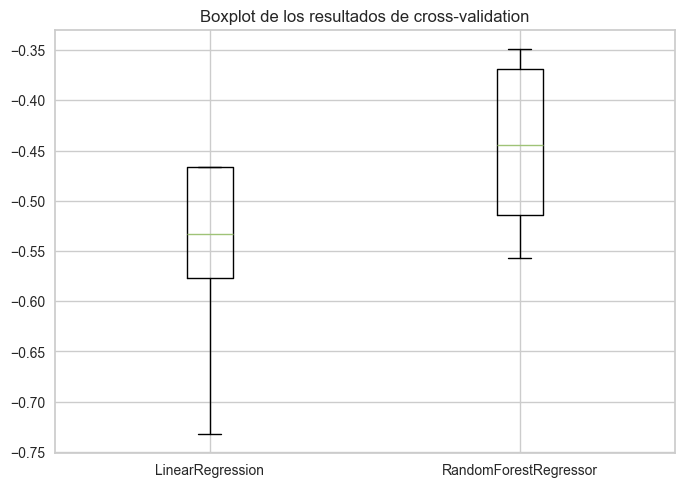

In [125]:
#graficamos los resultados de la validacion cruzada
plt.boxplot(resultado, labels=models.keys())
plt.title('Boxplot de los resultados de cross-validation')

In [ ]:
#se elegiemos el modelo de regresion lineal para hacer la prediccion
y_pred = models['LinearRegression'].fit(X_train, y_train).predict(X_test)

In [89]:
 models['LinearRegression'].score(X_test, y_test)

0.785534252311289

In [90]:
mean_squared_error(y_test, y_pred, )

0.44938708075691103

In [91]:
RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

np.float64(0.6703633945532163)

# Lineal Regression

In [92]:
linreg=LinearRegression()

In [93]:
#Scaler
scaler = StandardScaler()
X_train_scaled_LR = scaler.fit_transform(X_train)
X_test_scaled_LR= scaler.transform(X_test)

In [94]:
#pramatro para lineal regression
param_LN={'fit_intercept': [True, False]}

In [95]:
#para conseguir el mejor parametro
LN_CV=GridSearchCV(linreg, param_LN, cv=KF, scoring='r2')

In [96]:
LN_CV.fit(X_train_scaled_LR,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [97]:
#conseguimos el mejor estimados
best_LN_Es=LN_CV.best_estimator_
best_LN_Es

LinearRegression()

In [98]:
#Predecimos los datos basado en el mejor estimador
y_pred_LN = best_LN_Es.predict(X_test_scaled_LR)


In [99]:
#conseguimos el score basado en el mejor estimador
best_LN_Es.score(X_test_scaled_LR,y_test)

0.785534252311289

In [ ]:
#score para la data de entrenamiento
best_LN_Es.score(X_train_scaled_LR,y_train)

0.7413720813001252

In [ ]:
#Score para la data de testing
best_LN_Es.score(X_test_scaled_LR,y_test)

0.785534252311289

In [ ]:
#datos de mean squared error
mean_squared_error(y_test, y_pred_LN)

0.44938708075691114

In [128]:
#datos de RMSE
RMSE_LN= np.sqrt(mean_squared_error(y_test, y_pred_LN))
RMSE_LN

np.float64(0.6703633945532163)

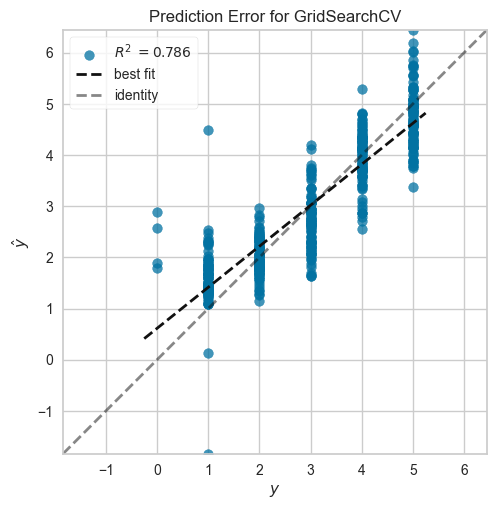

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Visualizamos los resultados de la prediccion
predictor_error_LR = PredictionError(LN_CV)

predictor_error_LR.fit(X_train_scaled_LR, y_train)  # Fiteamos los datos al visualizador
predictor_error_LR.score(X_test_scaled_LR, y_test)  # Calculamos las métricas para test
predictor_error_LR.show()                 # Visualizamos!

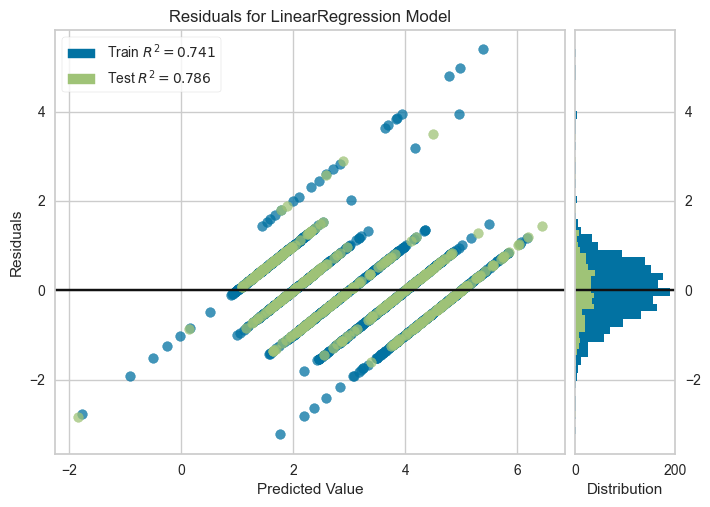

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [129]:
# visualizamos los residuos
vis_res_LR = ResidualsPlot(LN_CV.best_estimator_)

vis_res_LR.fit(X_train_scaled_LR, y_train)  
vis_res_LR.score(X_test_scaled_LR, y_test)  
vis_res_LR.show()  

### Random Forest Regressor

In [102]:
#Random Forest
rfr=RandomForestRegressor()

In [103]:
params = {'n_estimators' : [50, 100, 150,],
        'max_features': [50, 100],
        'max_depth': [10, 20, 50, 100]}

In [ ]:
#definicion de gredsearchcv
grid_rfr = GridSearchCV(estimator = rfr,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = KF, 
                        verbose = 1)

In [105]:
grid_rfr.fit(X_train_scaled_LR, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 50, 100],
                         'max_features': [50, 100],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
#conseguimos el mejor estimador
rfr_best=grid_rfr.best_estimator_

In [ ]:
#ajustamos el mejor estimador a los datos de entrenamiento
rfr_best.fit(X_train_scaled_LR, y_train)

RandomForestRegressor(max_depth=100, max_features=100, n_estimators=150)

In [ ]:
#predecimos los datos de testing
y_pred_rfr = rfr_best.predict(X_test_scaled_LR)

In [ ]:
#conseguimos el score basado en el mejor estimador para los datos de testing
rfr_best.score(X_test_scaled_LR, y_test)

0.8676933570104428

In [ ]:
#conseguimos el score basado en el mejor estimador para los datos de entrenamiento

rfr_best.score(X_train_scaled_LR, y_train)

0.9708106849876589

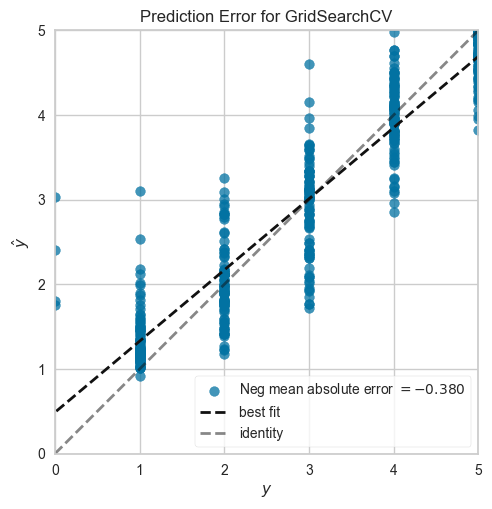

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#Visualizamos los resultados de la prediccion

predictor_error = PredictionError(grid_rfr)

predictor_error.fit(X_train_scaled_LR, y_train)  
predictor_error.score(X_test_scaled_LR, y_test)  
predictor_error.show()                

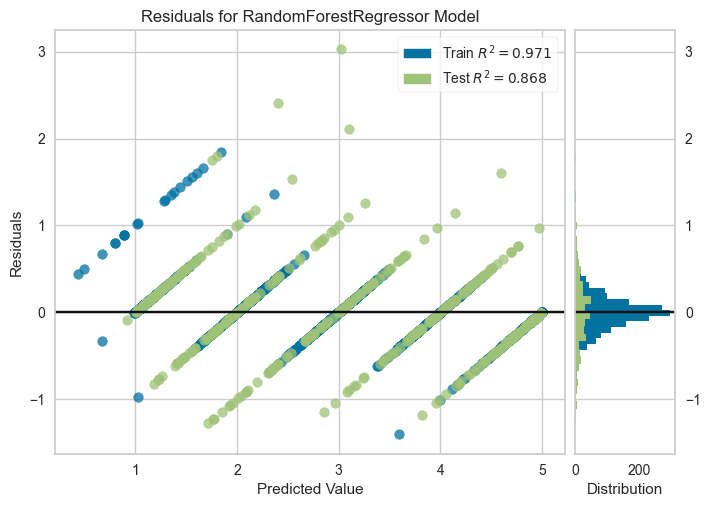

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# visualizamos los residuos

vis_res = ResidualsPlot(grid_rfr.best_estimator_)

vis_res.fit(X_train_scaled_LR, y_train)  
vis_res.score(X_test_scaled_LR, y_test)  
vis_res.show()              